<a href="https://colab.research.google.com/github/akashverma911/Covid-detector/blob/master/covid_detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
TRAIN_PATH = "drive/MyDrive/Dataset/Train"
VAL_PATH = "drive/MyDrive/Dataset/Test"  

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.layers import *
from keras.models import * 
from keras.preprocessing import image

In [ ]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy,optimizer='adam',metrics=['accuracy'])

In [ ]:
train_datagen = image.ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
)

test_dataset = image.ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(
    'drive/MyDrive/Dataset/Train',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 299 images belonging to 2 classes.


In [ ]:
train_generator.class_indices

{'Covid': 0, 'Normal': 1}

In [ ]:
validation_generator = test_dataset.flow_from_directory(
    'drive/MyDrive/Dataset/Test',
    target_size = (224,224),
    batch_size = 32,
    class_mode = 'binary')

Found 74 images belonging to 2 classes.


In [ ]:
hist = model.fit_generator(
    train_generator,
    steps_per_epoch=8,
    epochs = 10,
    validation_data = validation_generator,
    validation_steps=2
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
8/8 [==============================] - 118s 14s/step - loss: 0.7905 - accuracy: 0.5867 - val_loss: 0.6600 - val_accuracy: 0.5156
Epoch 2/10
8/8 [==============================] - 75s 9s/step - loss: 0.5571 - accuracy: 0.7437 - val_loss: 0.5235 - val_accuracy: 0.9688
Epoch 3/10
8/8 [==============================] - 73s 9s/step - loss: 0.3838 - accuracy: 0.8222 - val_loss: 0.2473 - val_accuracy: 0.9844
Epoch 4/10
8/8 [==============================] - 73s 9s/step - loss: 0.2929 - accuracy: 0.8844 - val_loss: 0.3036 - val_accuracy: 1.0000
Epoch 5/10
8/8 [==============================] - 74s 9s/step - loss: 0.2780 - accuracy: 0.8929 - val_loss: 0.3444 - val_accuracy: 0.9844
Epoch 6/10
8/8 [==============================] - 79s 10s/step - loss: 0.2079 - accuracy: 0.9299 - val_loss: 0.0915 - val_accuracy: 0.9844
Epoch 7/10
8/8 [==============================] - 73s 9s/step - loss: 0.1481 - accuracy: 0.9510 - val_loss: 0.0837 - val_accuracy: 0.9844
Epoch 8/10
8/8 [===============

In [ ]:
data_output = pd.DataFrame(model.history.history)

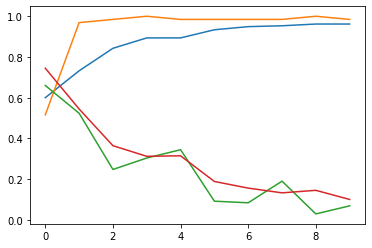

In [ ]:
plt.plot(data_output['accuracy'],label='accu')
plt.plot(data_output['val_accuracy'])
plt.plot(data_output['val_loss'])
plt.plot(data_output['loss'])

In [ ]:
from tensorflow.keras.preprocessing import image
pred_probabilities = model.predict_generator(validation_generator)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1976: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  warnings.warn('`Model.predict_generator` is deprecated and '


In [ ]:
pred_probabilities

array([[1.4493495e-02],
       [9.3105280e-01],
       [2.3019713e-01],
       [9.7584128e-01],
       [2.1541417e-03],
       [5.8400631e-04],
       [6.8663019e-01],
       [8.5287356e-01],
       [8.9239675e-01],
       [9.8634595e-01],
       [2.4629354e-02],
       [9.8819214e-01],
       [9.9091673e-01],
       [5.5993527e-02],
       [9.9233496e-01],
       [3.7395030e-02],
       [9.8886299e-01],
       [9.3268585e-01],
       [9.6739161e-01],
       [9.4781357e-01],
       [5.6054085e-02],
       [9.7651733e-05],
       [9.6107185e-01],
       [3.2520592e-03],
       [9.6803892e-01],
       [6.0509145e-02],
       [2.8897226e-03],
       [1.1728704e-03],
       [8.5891950e-01],
       [4.6241879e-03],
       [9.8469186e-01],
       [6.9168508e-03],
       [2.9096007e-04],
       [3.1017065e-02],
       [9.8092133e-01],
       [1.0681848e-04],
       [1.7883778e-03],
       [2.7783811e-02],
       [9.6427774e-01],
       [9.1123289e-01],
       [1.5137196e-03],
       [9.609552

In [ ]:
predictions = pred_probabilities > 0.5
predictions

array([[False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(classification_report(validation_generator.classes,predictions))

              precision    recall  f1-score   support

           0       0.49      0.50      0.49        36
           1       0.51      0.50      0.51        38

    accuracy                           0.50        74
   macro avg       0.50      0.50      0.50        74
weighted avg       0.50      0.50      0.50        74



In [ ]:
model.save("covid_detector_model.h5")